# Online Payments Fraud Detection Project

###  Context
Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.

###  Problem
Blossom Bank wants to build a Machine Learning model to predict online payment fraud.


### Objective:
The objective of this project is to explore and to identify fraudulent and non-fraudulent payments on finanacial transactions in Blossom bank. Models utilised in this project to detect the fraudulent transactions involves naive bayes, decison tree classifer and logistic regression models. 

### Business benefit of the solution 
The most efficient model can be used by the bank to automatically predict and prevent fraud across the organisation which will help keep the customers and their money safe thereby preventing customer churn.

## Dataset
The dataset contains historical information about non-fraudlent and fraudulent transactions from Blossom bank which can be used to detect fraud in online payments.

In [1]:
# Importing necessary libraries 

# data analysis libraries
import pandas as pd
import numpy as np

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset

data = pd.read_csv('Online Payment Fraud Detection.csv')

In [3]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0

## Data Dictionary
The below column reference:
- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of the recipient after the transaction
- isFraud: fraud transaction

In [4]:
# shape of the data

data.shape

(1048575, 10)

In [5]:
# information on the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
# descriptive statistics

data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06  
mean     9.781600e+05    1.114198e+06  1.089097e-03  
std      2.296780e+06    2.416593e+06  3.298351e-02  
min      0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00  
50%      1.263772e+05    2.182604e+05  0.000000e+00  
75%      9.159235e+05    1.149808e+06  0.000000e+00  
max      4.210000e+07    4.220000e+07  1.000000e+00

## Data Cleaning

In [7]:
# check for missing values

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

The entire dataset have no missing values

In [8]:
# changing some column name to fit 

data.rename(columns={'oldbalanceOrg' : 'oldbalanceOrig'}, inplace=True)

In [9]:
# Adding new columns (2 variables) for Exploratory Data Analysis


data['transfer_sent'] = data['oldbalanceOrig'] - data['newbalanceOrig']
data['transfer_received'] = data['newbalanceDest'] - data['oldbalanceDest']

In [10]:
data.head()

step      type    amount     nameOrig  oldbalanceOrig  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  transfer_sent  \
0  M1979787155             0.0             0.0        0        9839.64   
1  M2044282225             0.0             0.0        0        1864.28   
2   C553264065             0.0             0.0        1         181.00   
3    C38997010         21182.0             0.0        1         181.00   
4  M1230701703             0.0             0.0        0       11668.14   

   transfer_received  
0                0.0  
1                0.0  
2                0.0  
3           -21182.0  
4                0.0

# Exploratory Data Analysis (EDA)

## Univariate Analysis


In [11]:
# checking the distribution of the data with reference to the target value, i.e. isFraud
data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [12]:
# Understanding the percentage of non Fraudulent transaction vs Fraudulent transaction

isFraud_percentage = (data['isFraud'].value_counts()/data.shape[0]*100).round(2)
isFraud_percentage

0    99.89
1     0.11
Name: isFraud, dtype: float64

<AxesSubplot:ylabel='isFraud'>

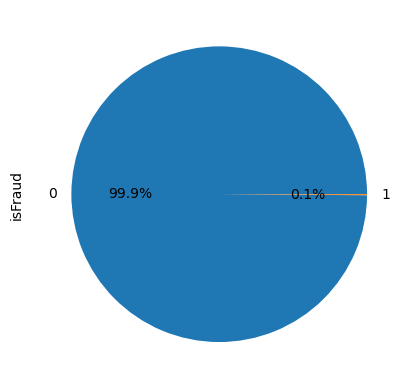

In [13]:
# visualisation of the distribution of the data with reference to the target value, i.e. isFraud

import plotly.express as px

data['isFraud'].value_counts().plot.pie(autopct='%1.1f%%')

0.1% of transaction made has been detected as fraud. This indicates that there is a huge difference between fraudulent and non fraudulent data which reflects data imbalance in the dataset.

Text(0, 0.5, 'Count of transactions')

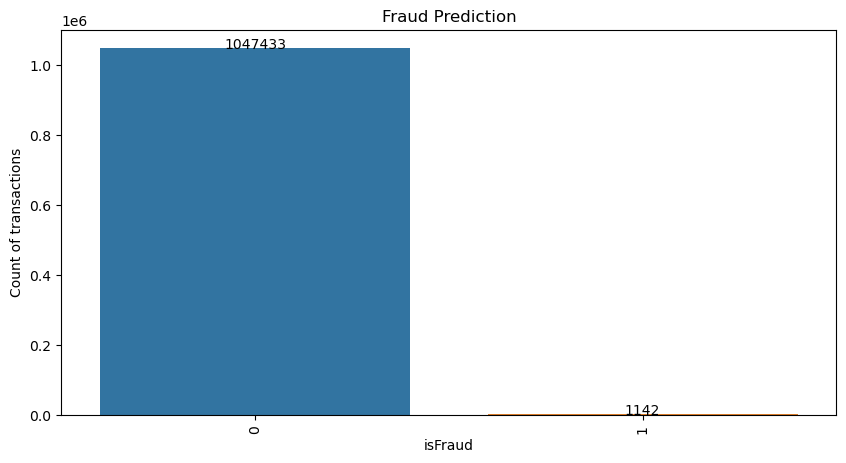

In [14]:
# Create visualization with label (a better method)

fig, ax1 = plt.subplots(figsize = (10, 5))
viz = sns.countplot(ax=ax1, x="isFraud", data=data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Fraud Prediction")
plt.ylabel("Count of transactions")

Text(0.5, 1.0, 'Distribution of the transaction amount')

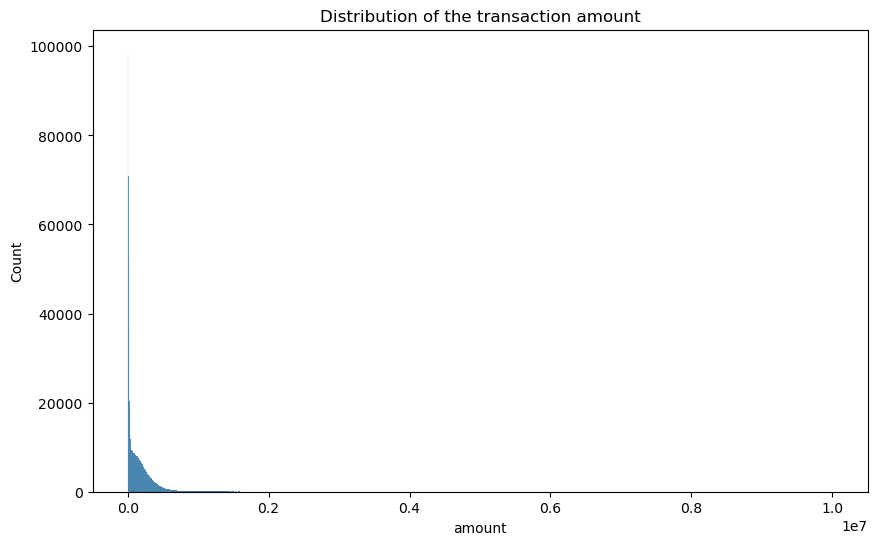

In [15]:
# distribution of the transaction amount
plt.figure(figsize=(10,6))
sns.histplot(data['amount']);
plt.ticklabel_format(style='')
plt.title('Distribution of the transaction amount')

The distribution of transaction amounts is right skewed. This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.

In [16]:
#distribution of the transaction type

data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

Text(0.5, 1.0, 'Distribution of the transaction type')

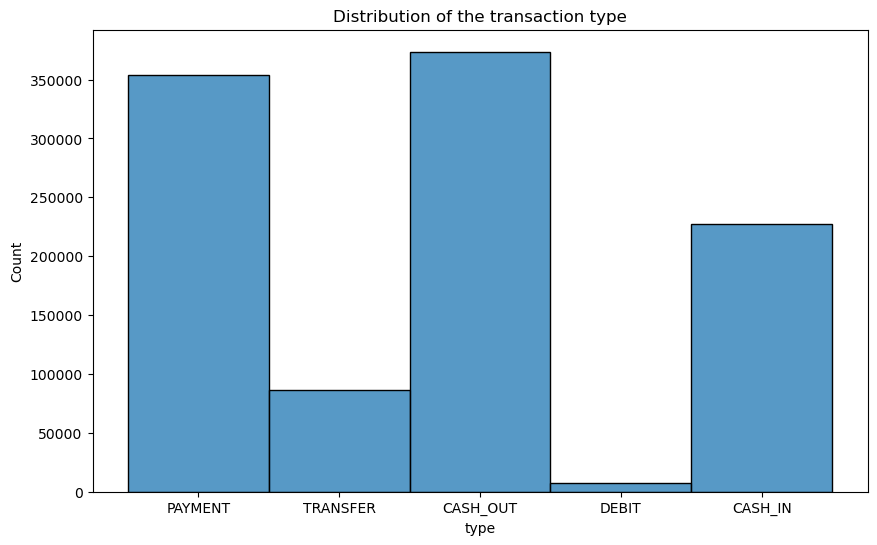

In [17]:
# distribution of the transaction type
plt.figure(figsize=(10,6))
sns.histplot(data['type']);
plt.ticklabel_format(style='')
plt.title('Distribution of the transaction type')

In [18]:
# distribution of the transaction type

import plotly.express as px

type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Transaction Type Distribution")
figure.show()

The most frequent utilised transaction type is CASH_OUT with 35.6% with PAYMENT following with 33.7%

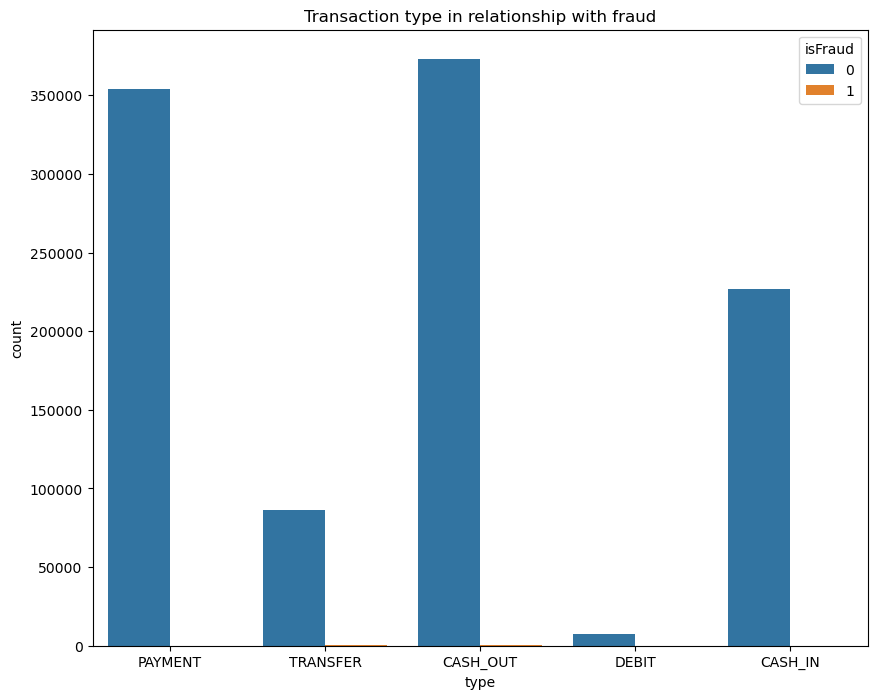

In [19]:
# Determining the distribution frequency between transaction type and isFraud

fig = plt.figure(figsize=(10,8))
sns.countplot(x='type', data=data, hue='isFraud')
plt.title('Transaction type in relationship with fraud')
plt.show(fig)

It can be seen that all transaction type are dominated by not fraud. The difference in every transaction type is huge.

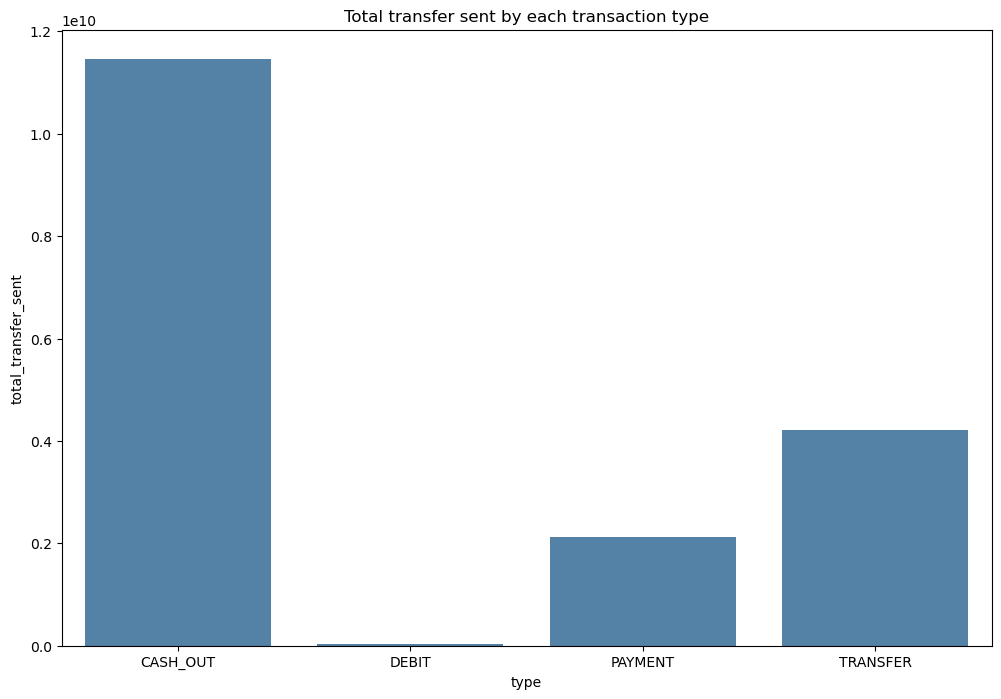

In [20]:
# Determining the distribution between the transaction type and transfer_sent, therefore, excluding CASH_IN transaction type

remove_cash_in = data[data['type']!='CASH_IN']
total_sent_by_trans_type = remove_cash_in.groupby('type')['transfer_sent'].sum().reset_index(name='total_transfer_sent')
fig = plt.figure(figsize=(12,8))
sns.barplot(x='type', y='total_transfer_sent', data=total_sent_by_trans_type, color='steelblue')
plt.title('Total transfer sent by each transaction type')
plt.show(fig)

From the visualisation, it can be seen that most of the transfer sent are from cash transactions followed by transfer and payment transactions.

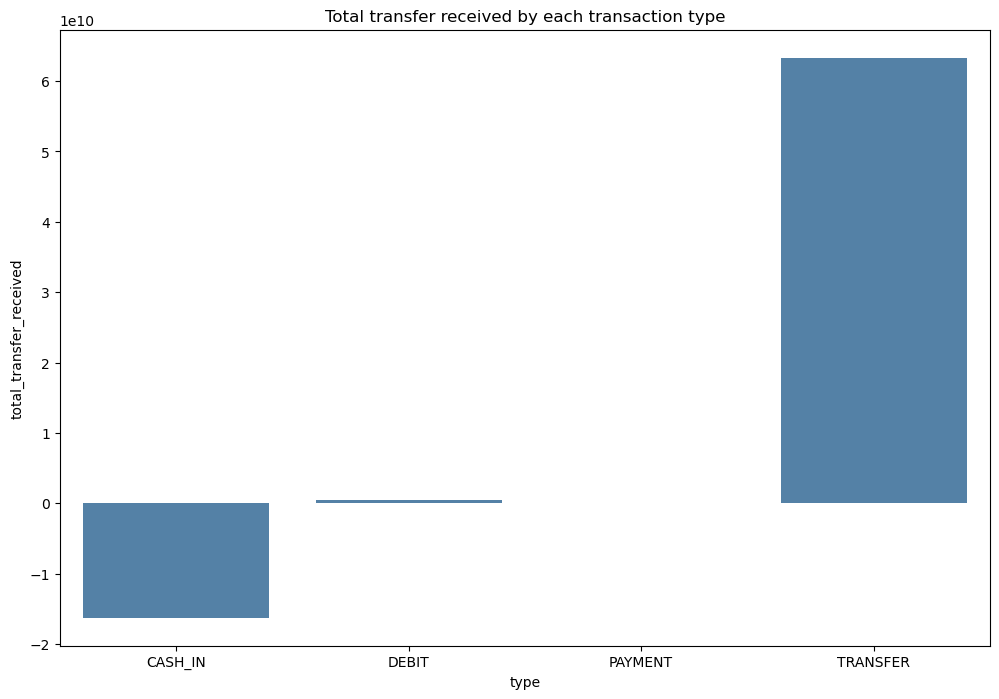

In [21]:
# Determining the distribution between the transaction type and transfer_received, therefore, excluding CASH_OUT transaction type
remove_cash_out = data[data['type']!='CASH_OUT']
total_received_by_trans_type = remove_cash_out.groupby('type')['transfer_received'].sum().reset_index(name='total_transfer_received')
fig = plt.figure(figsize=(12,8))
sns.barplot(x='type', y='total_transfer_received', data=total_received_by_trans_type, color='steelblue')
plt.title('Total transfer received by each transaction type')
plt.show(fig)

The chart indicates that most of the transfer received are from transfer transaction type, then cash_in transactions.

Text(0.5, 1.0, 'Distribution of the transaction step/hour')

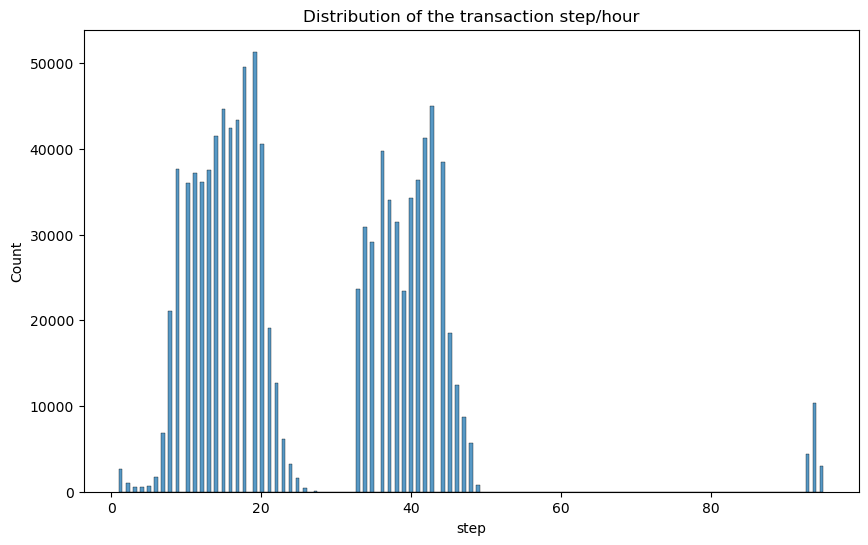

In [22]:
# distribution of the transaction step/hour
plt.figure(figsize=(10,6))
sns.histplot(data['step']);
plt.ticklabel_format(style='')
plt.title('Distribution of the transaction step/hour')

In [23]:
# distribution of the transaction type

data['step'].value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: step, Length: 95, dtype: int64

The value count indicated that there are 95 steps and all steps have more than 1 occurrences.

In [24]:
# distribution of the nameOrig

data['nameOrig'].value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

The output indicated that there are more than 1000 000 senders. Where maximum senders appeared twice and the rest appeared only once.

In [25]:
# distribution of the nameDest

data['nameDest'].value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

The output indicated that there are more than 400 000 recipients. Where some recipients appear more than once and some recipients appeared only once.

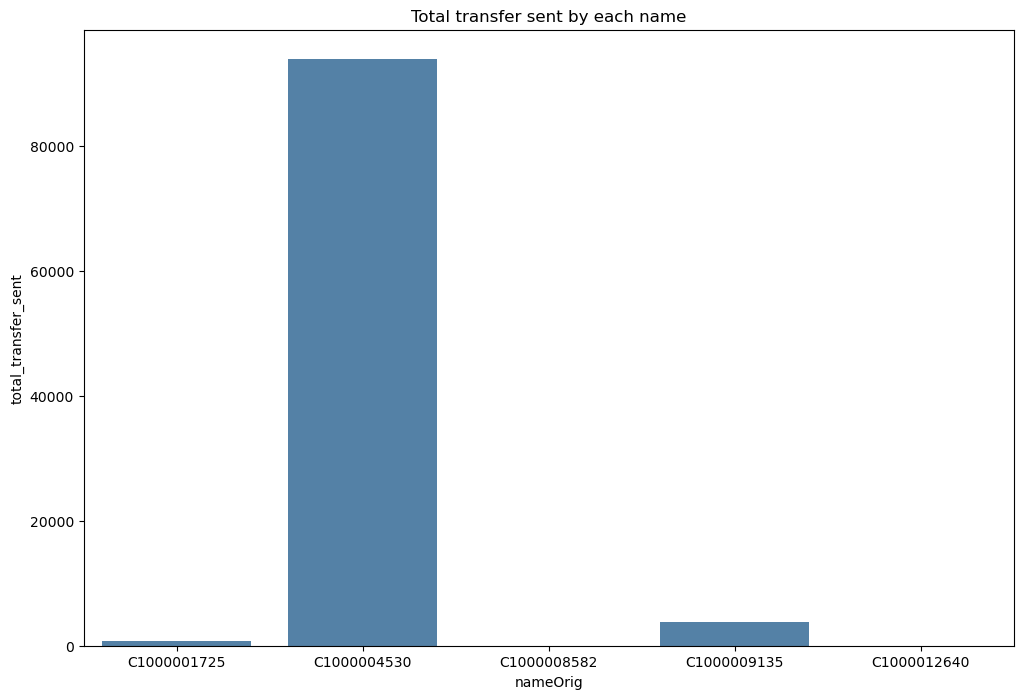

In [26]:
# Determining the top 5 clients that sent the most transfers (Top senders).

transfer_sent_by_name = remove_cash_in.groupby('nameOrig')['transfer_sent'].sum().reset_index(name='total_transfer_sent').head(5)
fig = plt.figure(figsize=(12,8))
sns.barplot(x='nameOrig', y='total_transfer_sent', data=transfer_sent_by_name, color='steelblue')
plt.title('Total transfer sent by each name')
plt.show(fig)

The output indicates the top sender involves the client with nameOrig C1000004530

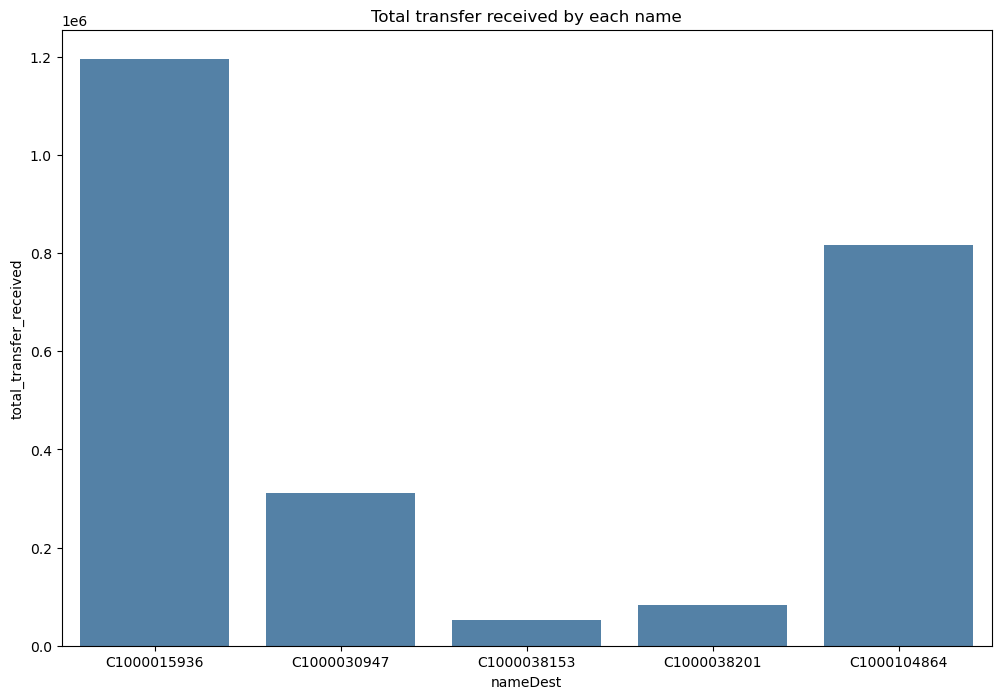

In [27]:
# Determining the top 5 clients that received the most transfers (Top recipients).

transfer_received_by_name = remove_cash_in.groupby('nameDest')['transfer_received'].sum().reset_index(name='total_transfer_received').head(5)
fig = plt.figure(figsize=(12,8))
sns.barplot(x='nameDest', y='total_transfer_received', data=transfer_received_by_name, color='steelblue')
plt.title('Total transfer received by each name')
plt.show(fig)

From the output, it can be deduced that the top receiver is the client with nameDest C1000015936.

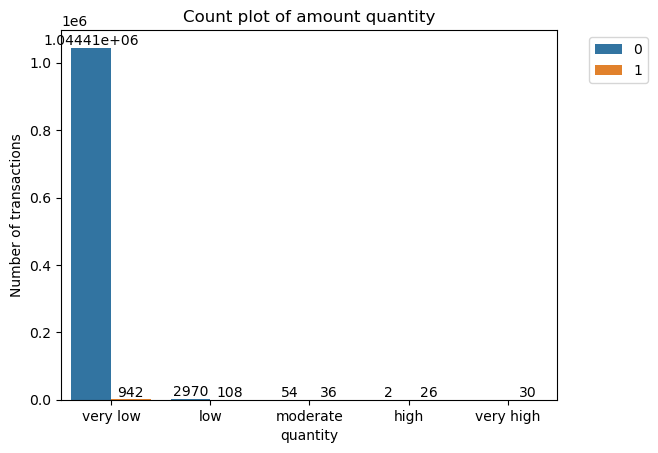

In [28]:
data['quantity'] = pd.cut(data['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=data, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax

Most fraudulent transactions fall into the category of very high and high amounts.This suggests that in most cases, higher transactions are more prone to fraudulent transactions.

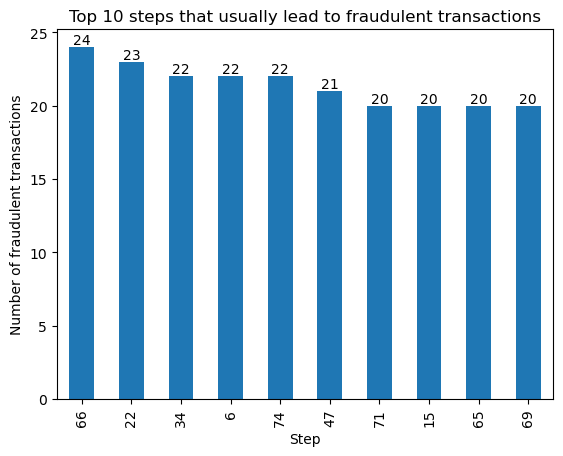

In [29]:
# Determining number of fradulent transactions
data1 = data[data['isFraud']==1]
data2 = data1['step'].value_counts().head(10)
ax = data2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that usually lead to fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')

del ax, data2

Step 66 has the highest number of fraudulent transactions with 24 cases. This indicates that Step 66 is the step that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

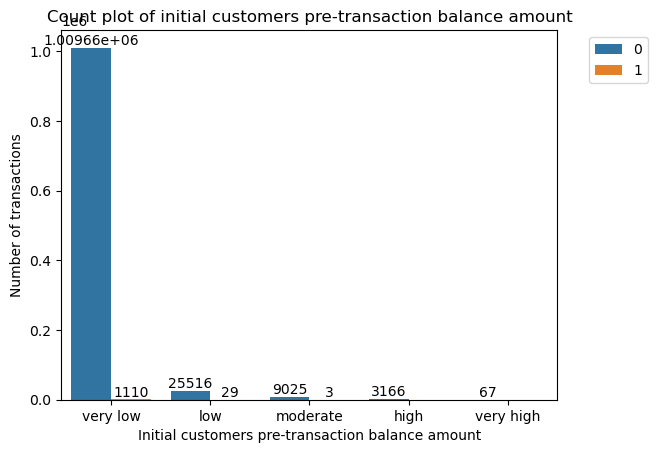

In [30]:
# Determining the count plot of initial customers pre-transaction balance amount
data['oldbalanceOrig_amt'] = pd.cut(data['oldbalanceOrig'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrig_amt', data=data, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

Initial customers with very low pre-transaction balances have the highest number of fraudulent transactions. This implies that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

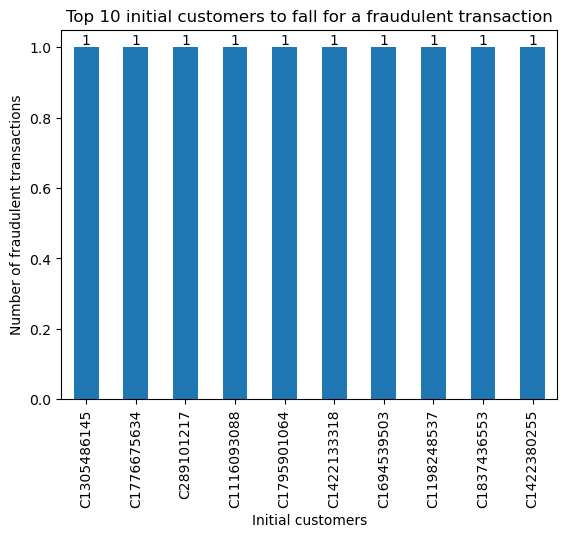

In [31]:
data2 = data1['nameOrig'].value_counts().head(10)
ax = data2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers to fall for a fraudulent transaction', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')

del ax, data2

Initial customers fell victim of a fraudulent transaction at most once.

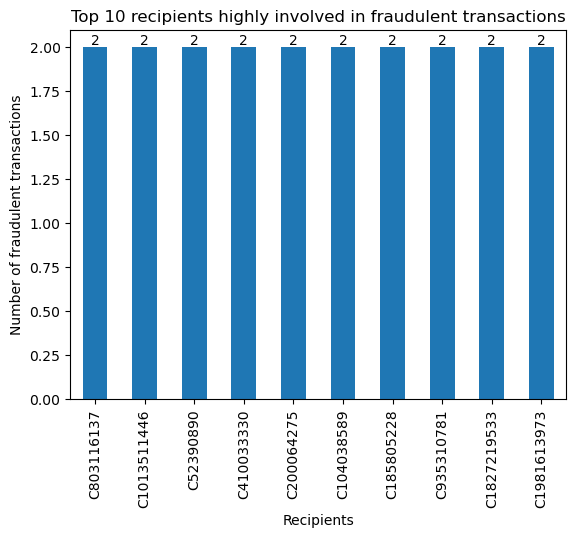

In [32]:
data2 = data1['nameDest'].value_counts().head(10)
ax = data2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')

del ax, data2

Suspicious recipients only have a maximum of 2 involved fraudulent transactions.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

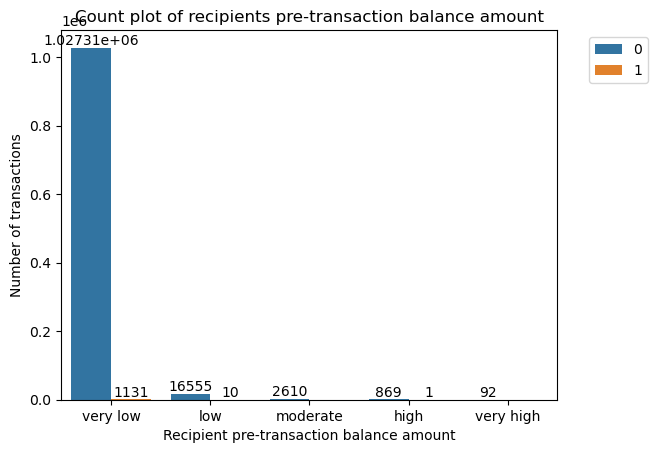

In [33]:
data['oldbalanceDest_amt'] = pd.cut(data['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=data, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

The recipients with low pre-transaction balances have the most fraudulent transactions. As a result, recipients with pretty low pre-transaction balances may be  highly susceptible to fraudulent transactions.

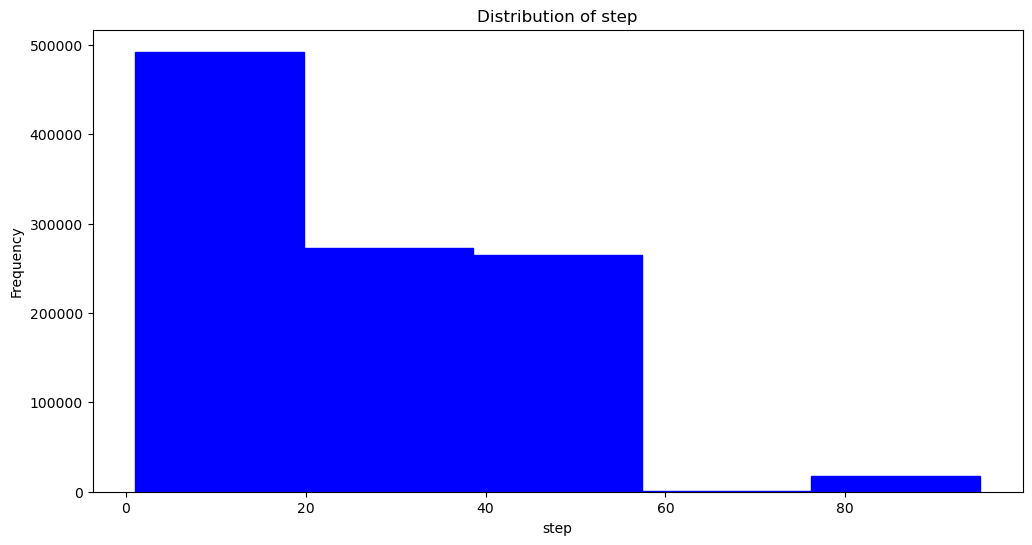

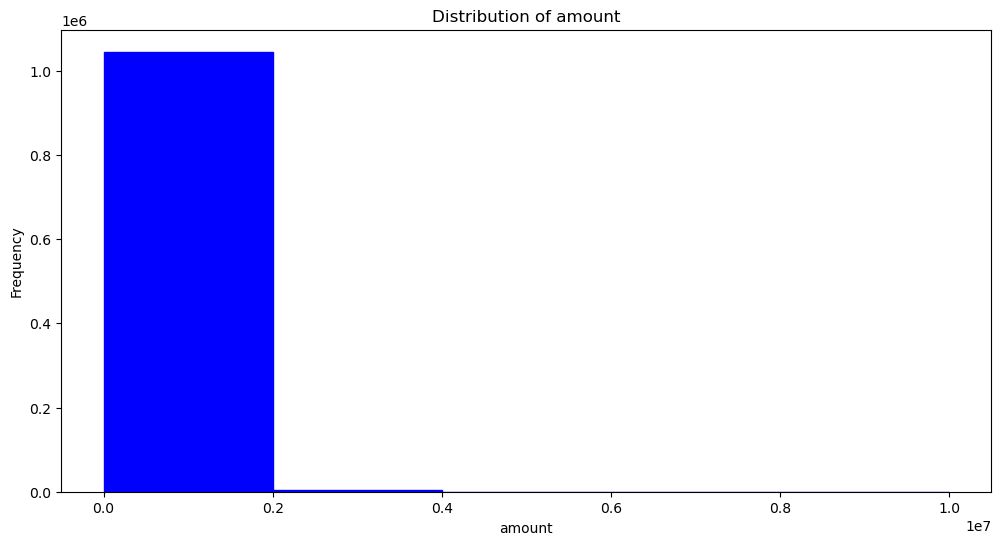

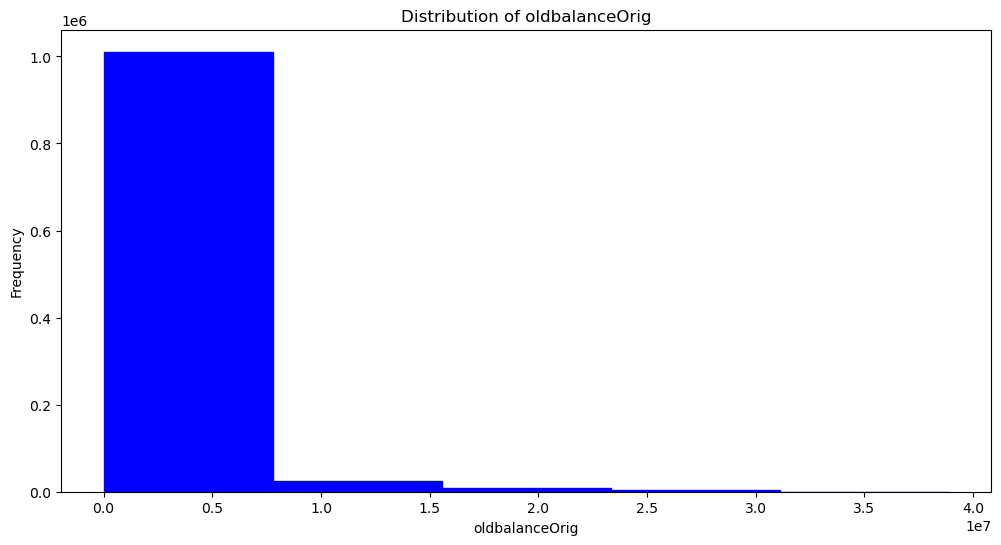

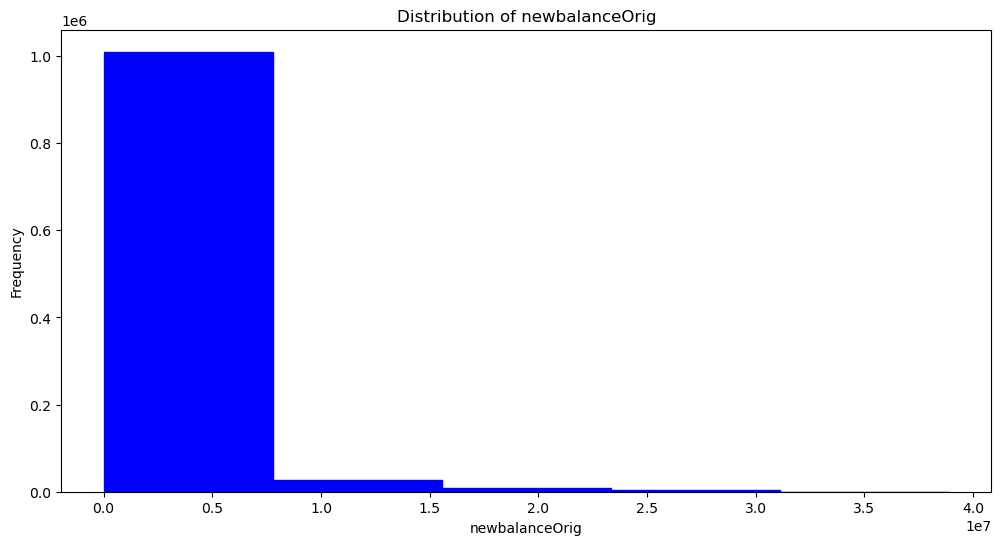

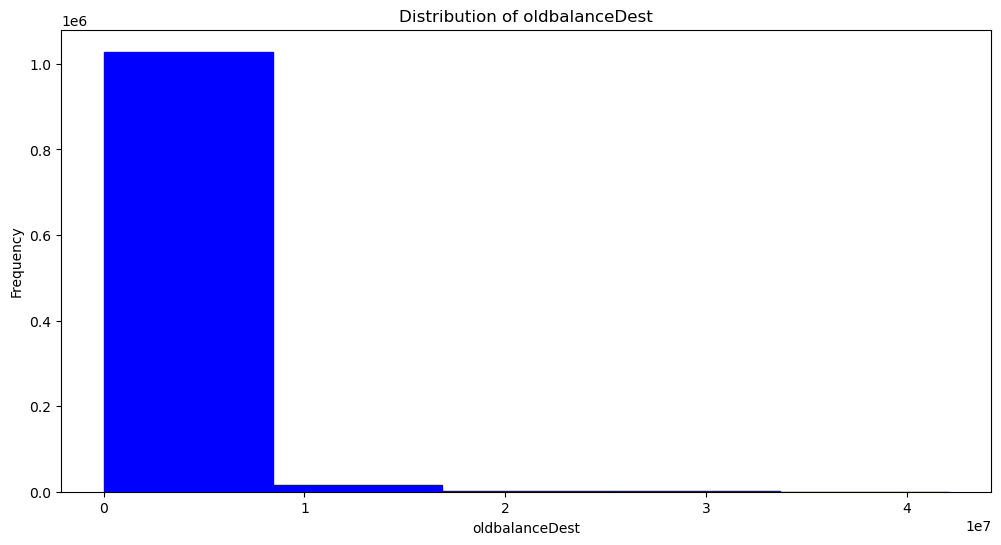

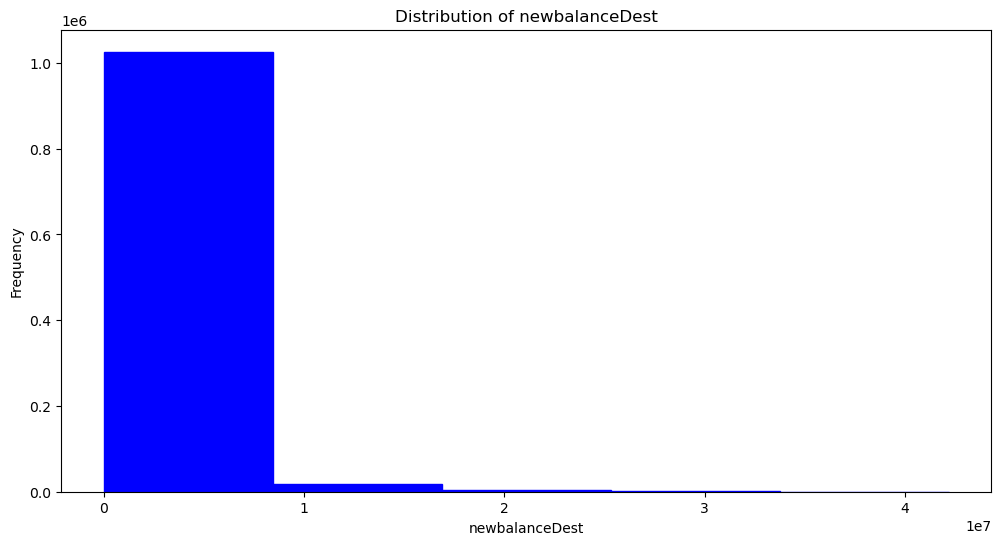

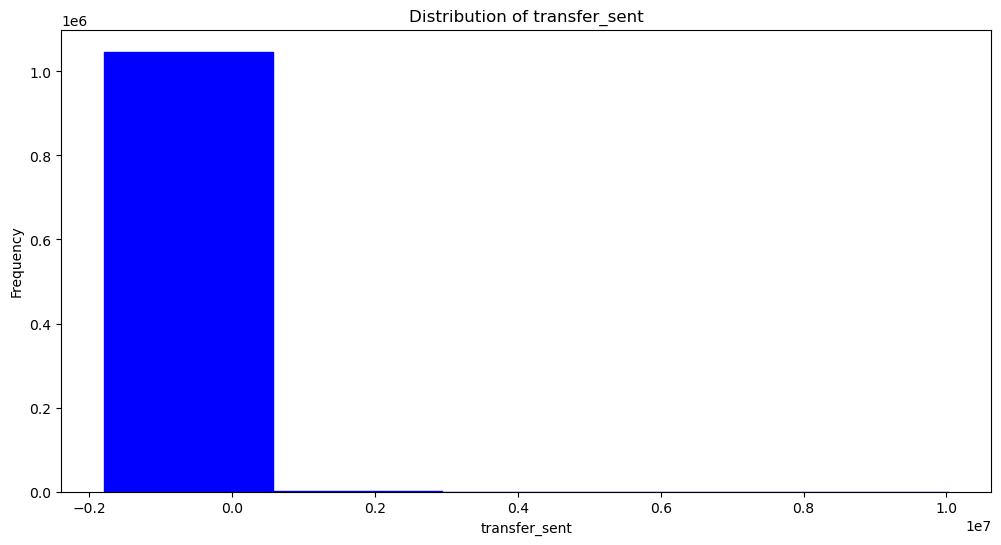

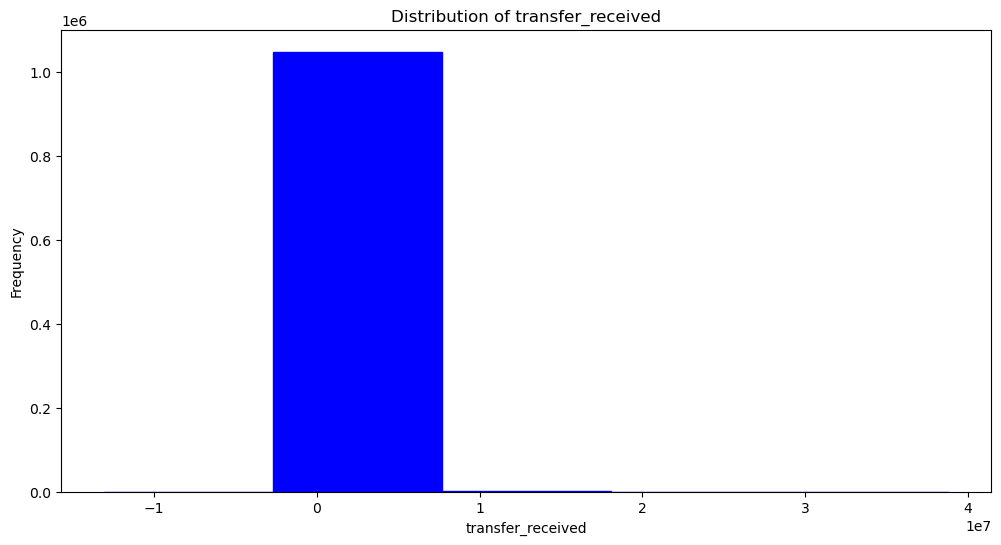

In [34]:
# Columns Distribution Visualisation
feature=['step','amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest', 'transfer_sent','transfer_received' ]

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='blue',edgecolor='blue')
    plt.title(f"Distribution of {i}")
    plt.show()

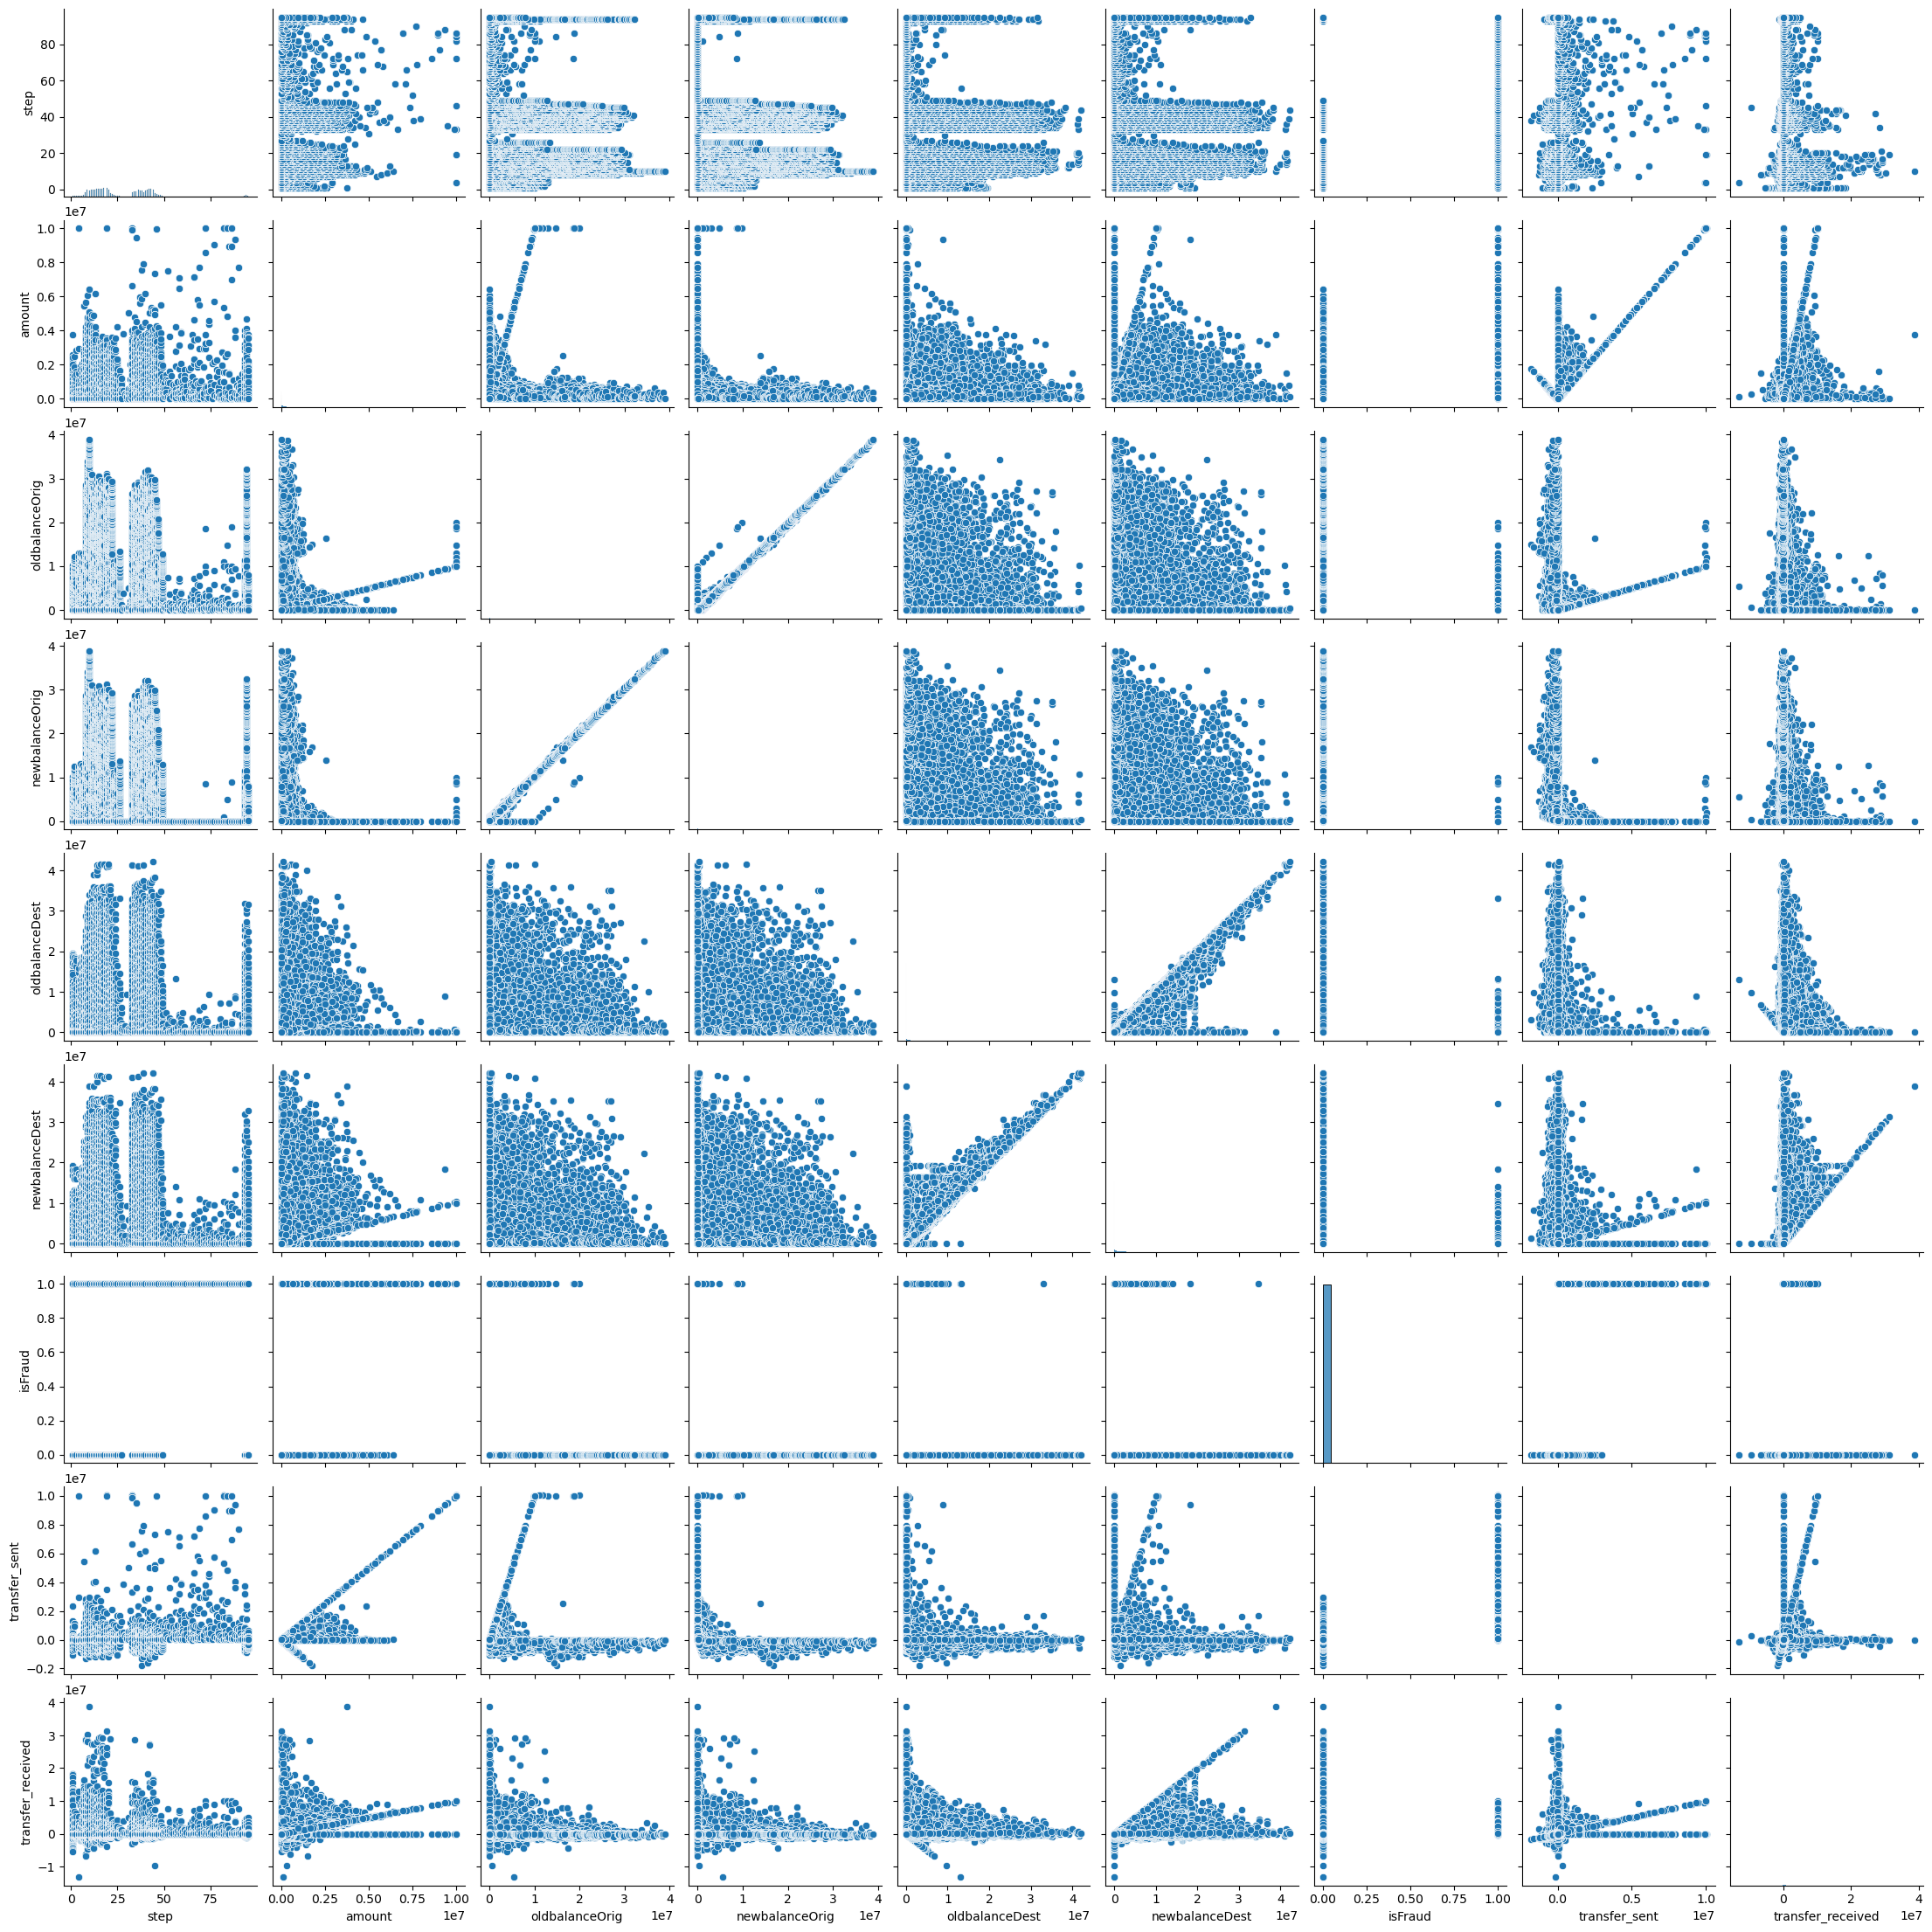

In [35]:
# multivariate analysis

sns.pairplot(data)


# Features correlation¶

Exploration of the features correlation 

In [36]:
data.corr()

step    amount  oldbalanceOrig  newbalanceOrig  \
step               1.000000 -0.025996       -0.006780       -0.007180   
amount            -0.025996  1.000000        0.004864       -0.001133   
oldbalanceOrig    -0.006780  0.004864        1.000000        0.999047   
newbalanceOrig    -0.007180 -0.001133        0.999047        1.000000   
oldbalanceDest    -0.002251  0.215558        0.093305        0.095182   
newbalanceDest    -0.019503  0.311936        0.064049        0.063725   
isFraud            0.045030  0.128862        0.003829       -0.009438   
transfer_sent      0.010708  0.131801       -0.248333       -0.290369   
transfer_received -0.083239  0.513277       -0.118078       -0.128184   

                   oldbalanceDest  newbalanceDest   isFraud  transfer_sent  \
step                    -0.002251       -0.019503  0.045030       0.010708   
amount                   0.215558        0.311936  0.128862       0.131801   
oldbalanceOrig           0.093305        0.064049  0.003829      -0.248333   
newbalanceOrig           0.095182        0.063725 -0.009438      -0.290369   
oldbalanceDest           1.000000        0.978403 -0.007552      -0.066818   
newbalanceDest           0.978403        1.000000 -0.000495      -0.010073   
isFraud                 -0.007552       -0.000495  1.000000       0.293467   
transfer_sent           -0.066818       -0.010073  0.293467       1.000000   
transfer_received        0.134147        0.336089  0.032034       0.256157   

                   transfer_received  
step                       -0.083239  
amount                      0.513277  
oldbalanceOrig             -0.118078  
newbalanceOrig             -0.128184  
oldbalanceDest              0.134147  
newbalanceDest              0.336089  
isFraud                     0.032034  
transfer_sent               0.256157  
transfer_received           1.000000

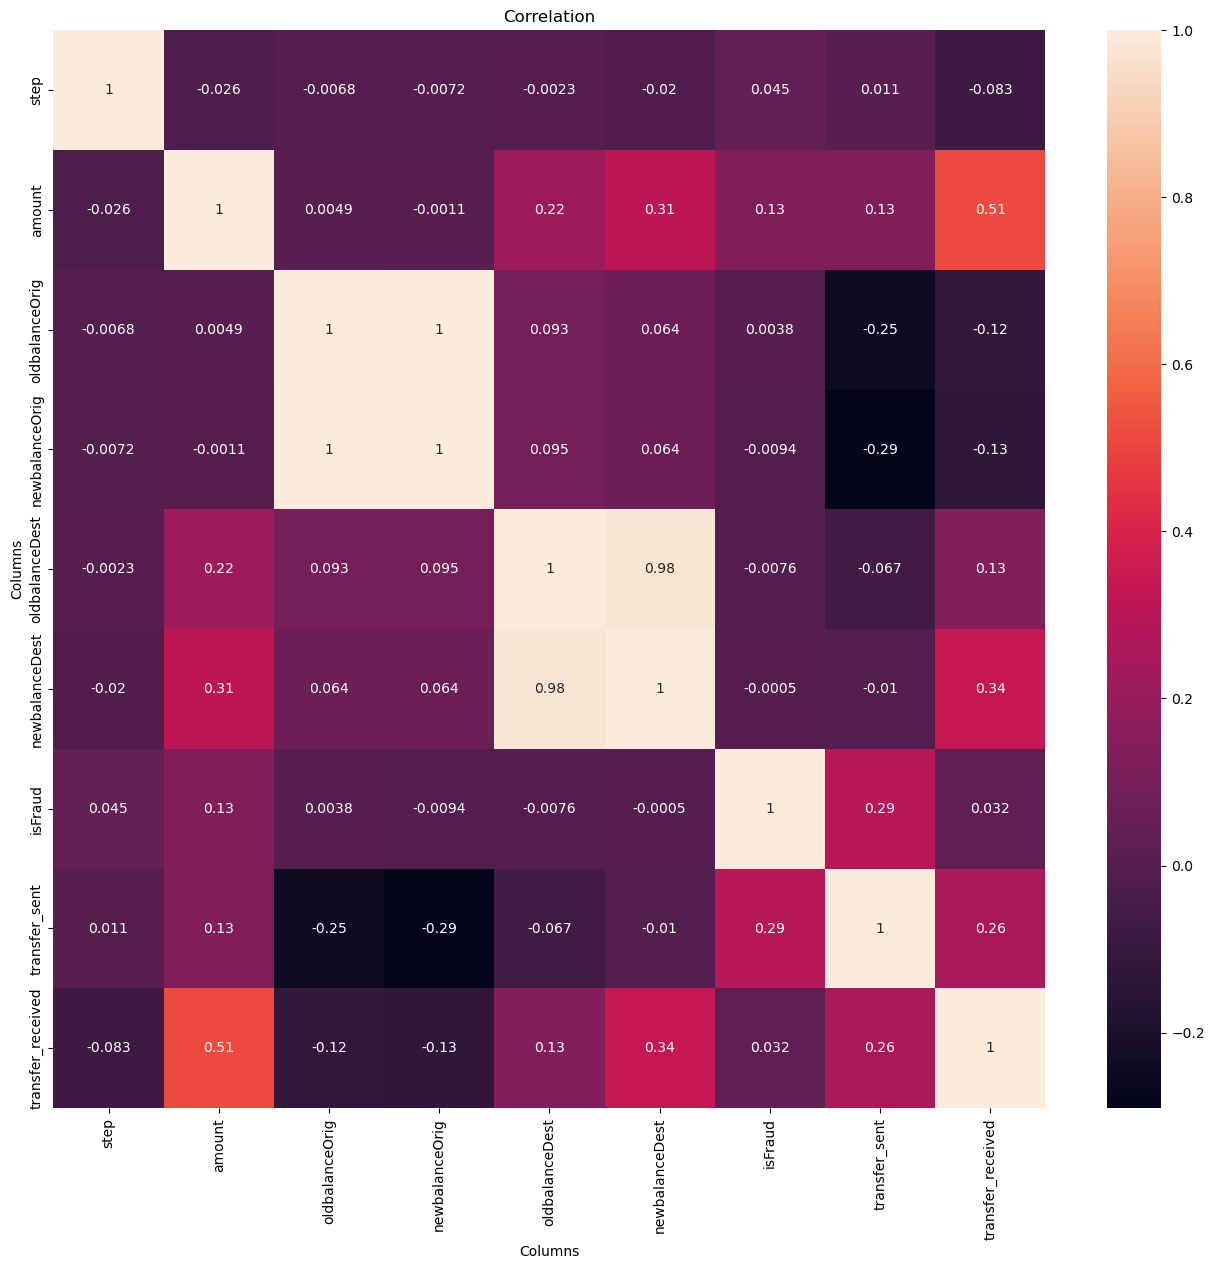

In [37]:
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(data.corr(), annot=True, ax=ax).set(
    title = 'Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

From the correlation output, it can be deduced that there is a high correlation between oldbalanceOrig and newbalanceOrig.

The output also showed a high correlation between oldbalanceDest and newbalanceDest.

# Feature Engineering

In [38]:
 # variable encoding
    
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'transfer_sent', 'transfer_received', 'quantity',
       'oldbalanceOrig_amt', 'oldbalanceDest_amt'],
      dtype='object')

In [39]:
#encoded target variable using label encoder

from sklearn import preprocessing

#lee = preprocessing.LabelEncoder()
#lee.fit(data['type'])
#data['type'] = lee.transform(data['type'])

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrig  newbalanceOrig  \
0     1     2   9839.64  C1231006815        170136.0       160296.36   
1     1     2   1864.28  C1666544295         21249.0        19384.72   
2     1     4    181.00  C1305486145           181.0            0.00   
3     1     1    181.00   C840083671           181.0            0.00   
4     1     2  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  transfer_sent  \
0  M1979787155             0.0             0.0        0        9839.64   
1  M2044282225             0.0             0.0        0        1864.28   
2   C553264065             0.0             0.0        1         181.00   
3    C38997010         21182.0             0.0        1         181.00   
4  M1230701703             0.0             0.0        0       11668.14   

   transfer_received  quantity oldbalanceOrig_amt oldbalanceDest_amt  
0                0.0  very low           very low  

## Model Selection, Training, and Validation

In [40]:
print('Baseline accuracy:' )
print(data["isFraud"].value_counts()/data["isFraud"].count())

Baseline accuracy:
0    0.998911
1    0.001089
Name: isFraud, dtype: float64


In [41]:
X = data[['step','type','amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y = data['isFraud']

In [42]:
data = data.drop(columns=['nameOrig', 'nameDest', 'isFraud', 'quantity', 'oldbalanceOrig_amt', 'oldbalanceDest_amt'],axis=1)

In [43]:
X = pd.get_dummies(data=X, prefix='type')
X.head()

step  type    amount  oldbalanceOrig  newbalanceOrig  oldbalanceDest  \
0     1     2   9839.64        170136.0       160296.36             0.0   
1     1     2   1864.28         21249.0        19384.72             0.0   
2     1     4    181.00           181.0            0.00             0.0   
3     1     1    181.00           181.0            0.00         21182.0   
4     1     2  11668.14         41554.0        29885.86             0.0   

   newbalanceDest  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
print(X_train.shape)
print(X_test.shape)

(838860, 9)
(209715, 9)


In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# Creating Logistic Regression object
clf = LogisticRegression()

In [49]:
# Train Logistic Regression

clf = clf.fit(X_train,y_train)

In [50]:
#Predicting the response for test dataset
prediction = clf.predict(X_test)

prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
score = roc_auc_score(y_test,prediction)

score

0.671926607731873

In [53]:
# naive bayes model

from sklearn.naive_bayes import GaussianNB

In [54]:
# Creating and Training naive bayes model
nb = GaussianNB()

nb = nb.fit(X_train,y_train)

In [55]:
# Predicitng the response for test dataset
nb_pred = nb.predict(X_test)

nb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
score2 = roc_auc_score(y_test,nb_pred)

score2

0.7043711162345193

In [57]:
# Creating DecisionTreeClassifier

from sklearn import tree

dtc = tree.DecisionTreeClassifier()

In [58]:
# Testing the model

dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
# Predicting the response for test dataset
dtc_pred = dtc.predict(X_test)

dtc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
score4 = roc_auc_score(y_test,dtc_pred)

score4

0.9116835579735822

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

* Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

In [61]:
from sklearn import metrics

In [62]:
# Evaluating LogisticRegression
model = LogisticRegression()

In [63]:
model.fit(X_train,y_train)

LogisticRegression()

In [64]:
print(model.coef_)
print(model.intercept_)

[[ 0.64568857  0.44666347 -3.95829982 -8.54017749 -8.60407189 -0.15893666
  -0.41515014  3.74495417 -1.26761961]]
[-15.43133949]


In [65]:
predictions = model.predict(X_test)

Text(0, 0.5, 'predictions')

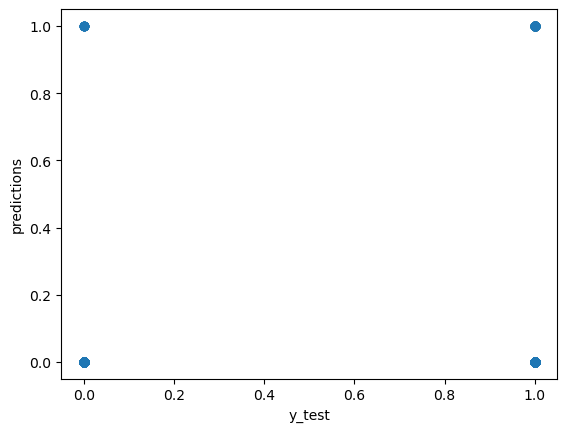

In [66]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [67]:
mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
r2_score = metrics.r2_score(y_test,predictions)
rmse = np.sqrt(mse)

In [68]:
print(r2_score)
print(mse)
print(mae)
print(rmse)

0.3069619765133722
0.0007295615478148916
0.0007295615478148916
0.02701039703178929


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[209486      8]
 [   145     76]]


The result is showing that the correct predictions are 209486 + 76 while incorrect predictions involves 145 + 8.

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_test, predictions)
print('Cohens kappa: %f' % kappa)

Accuracy: 0.999270
Precision: 0.904762
Recall: 0.343891
F1 score: 0.498361
Cohens kappa: 0.498069


In [71]:
# Evaluating naive bayes model

nb_mae = metrics.mean_absolute_error(y_test,nb_pred)
nb_mse = metrics.mean_squared_error(y_test,nb_pred)
nb_r2_score = metrics.r2_score(y_test,nb_pred)
nb_rmse = np.sqrt(nb_mse)

In [72]:
print(nb_r2_score)
print(nb_mse)
print(nb_mae)
print(nb_rmse)

-15.32489566435168
0.01718522757075078
0.01718522757075078
0.13109243902968157


In [73]:
# accuracy: (tp + tn) / (p + n)
l_accuracy = accuracy_score(y_test, nb_pred)
print('Accuracy: %f' % l_accuracy)

# precision tp / (tp + fp)
l_precision = precision_score(y_test, nb_pred)
print('Precision: %f' % l_precision)

# recall: tp / (tp + fn)
l_recall = recall_score(y_test, nb_pred)
print('Recall: %f' % l_recall)

# f1: 2 tp / (2 tp + fp + fn)
l_f1 = f1_score(y_test, nb_pred)
print('F1 score: %f' % l_f1)

# kappa
l_kappa = cohen_kappa_score(y_test, nb_pred)
print('Cohens kappa: %f' % l_kappa)

Accuracy: 0.982815
Precision: 0.026323
Recall: 0.425339
F1 score: 0.049578
Cohens kappa: 0.047688


In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrixl = confusion_matrix(y_test, nb_pred)
print(confusion_matrixl)

[[206017   3477]
 [   127     94]]


The result is showing that the correct predictions are 206017 + 94 while incorrect predictions involves 3477 + 127.

In [75]:
# Evaluating DecisionTreeClassifier

dtc_mae = metrics.mean_absolute_error(y_test,dtc_pred)
dtc_mse = metrics.mean_squared_error(y_test,dtc_pred)
dtc_r2_score = metrics.r2_score(y_test,dtc_pred)
dtc_rmse = np.sqrt(dtc_mse)

In [76]:
print(dtc_r2_score)
print(dtc_mse)
print(dtc_mae)
print(dtc_rmse)

0.6693347992514782
0.000348091457454164
0.000348091457454164
0.018657209262217218


In [77]:
# accuracy: (tp + tn) / (p + n)
d_accuracy = accuracy_score(y_test, dtc_pred)
print('Accuracy: %f' % d_accuracy)

# precision tp / (tp + fp)
d_precision = precision_score(y_test, dtc_pred)
print('Precision: %f' % d_precision)

# recall: tp / (tp + fn)
d_recall = recall_score(y_test, dtc_pred)
print('Recall: %f' % d_recall)

# f1: 2 tp / (2 tp + fp + fn)
d_f1 = f1_score(y_test, dtc_pred)
print('F1 score: %f' % d_f1)

# kappa
d_kappa = cohen_kappa_score(y_test, dtc_pred)
print('Cohens kappa: %f' % d_kappa)

Accuracy: 0.999652
Precision: 0.842593
Recall: 0.823529
F1 score: 0.832952
Cohens kappa: 0.832778


In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrixd = confusion_matrix(y_test, dtc_pred)
print(confusion_matrixd)

[[209460     34]
 [    39    182]]


The result is showing that the correct predictions are 209461 + 33 while incorrect predictions involves 33 + 42.

## Conclusion

For this data, Decision Tree Classifier showcased to be the most performed model of the models.
